# 1ª tarea

Es necesario descargar los 27 capitulos del libro "The Little Prince (Antoine de Saint Exupéry)", de la seguiente url: http://www.angelfire.com/hi/littleprince/frames.html
<br>Para eso fue criado un archivo llamado data_retrieval.py
<br>Ese archivo va entrar en los sitios de los capitulos del libro y utilizar Beautiful Soup 4 para extraer el texto de cada pagina.

In [7]:
########### Código en data_retrieval.py ###########

# Si no tiene BeautifulSoup, puedes descarga-lo con
# pip install beautifulsoup4

from bs4 import BeautifulSoup

# Vas hacer requisiciones con requests para tomar las paginas web con los capitulos, puedes descarga-lo con
# pip install
import requests

# Acá vamos crear el objeto beautifulsoup que tiene todo el texto de una página html
def open_soup(link):
    # Hace una requisición para el sitio, con un tiempo de 20 segundos para el timeout
    page_response = requests.get(link, timeout=20)
    # Crea un objeto BeautifulSoup con el contenido, utilisando um parser html
    soup = BeautifulSoup(page_response.content, "html.parser")
    return soup

In [8]:
########### Código en data_retrieval.py ###########

# Acá juntaremos todo el texto del libro en una variable
def create_book():
    # Primero necesitamos los links de cada capitulo
    links = [
            'http://www.angelfire.com/hi/littleprince/framechapter1.html',
            'http://www.angelfire.com/hi/littleprince/framechapter2.html',
            'http://www.angelfire.com/hi/littleprince/framechapter3.html',
            'http://www.angelfire.com/hi/littleprince/framechapter4.html',
            'http://www.angelfire.com/hi/littleprince/framechapter5.html',
            'http://www.angelfire.com/hi/littleprince/framechapter6.html',
            'http://www.angelfire.com/hi/littleprince/framechapter7.html',
            'http://www.angelfire.com/hi/littleprince/framechapter8.html',
            'http://www.angelfire.com/hi/littleprince/framechapter9.html',
            'http://www.angelfire.com/hi/littleprince/framechapter10.html',
            'http://www.angelfire.com/hi/littleprince/framechapter11.html',
            'http://www.angelfire.com/hi/littleprince/framechapter12.html',
            'http://www.angelfire.com/hi/littleprince/framechapter13.html',
            'http://www.angelfire.com/hi/littleprince/framechapter14.html',
            'http://www.angelfire.com/hi/littleprince/framechapter15.html',
            'http://www.angelfire.com/hi/littleprince/framechapter16.html',
            'http://www.angelfire.com/hi/littleprince/framechapter17.html',
            'http://www.angelfire.com/hi/littleprince/framechapter18.html',
            'http://www.angelfire.com/hi/littleprince/framechapter19.html',
            'http://www.angelfire.com/hi/littleprince/framechapter20.html',
            'http://www.angelfire.com/hi/littleprince/framechapter21.html',
            'http://www.angelfire.com/hi/littleprince/framechapter22.html',
            'http://www.angelfire.com/hi/littleprince/framechapter23.html',
            'http://www.angelfire.com/hi/littleprince/framechapter24.html',
            'http://www.angelfire.com/hi/littleprince/framechapter25.html',
            'http://www.angelfire.com/hi/littleprince/framechapter26.html',
            'http://www.angelfire.com/hi/littleprince/framechapter27.html'
        ]
    
    # Después crearemos objetos soup para cada un de los capitulos
    soups = [open_soup(link) for link in links]
    # Esa variable es la que va tener todo el libro
    book = ''
    
    # Y para cada uno de los objetos soup, buscaremos el contenido del texto en el primero "<p>" posible
    for soup in soups:
        text = soup.find('p').get_text()
        book += text + '\n'
    
    return book

Con eso tenemos todo lo necesario para tener una variable con un texto con el contenido del libro.
<br>Asi, podemos hacer un codigo para guardar la variable en un archivo de texto, si es que no existe. 
<br>Asi despues podemos cargar el texto mas rápido.

In [28]:
########### Código en main.py ###########

# Ese modulo va ayudar-nos a chequear si existe un arquivo con el texto del libro
import os

# Vamos utilizar la función create_book del archivo data_retrieval
from data_retrieval import create_book

# Esa función va guardar la variable de texto "book" en el archivo con el path "location"
def save_book(book, location):
    # Abres un archivo con el path "location", con el modo de escrita ('w') e llama-lo de "file"
    with open(location, 'w') as file:
        # Escribe el contenido de la variable "book" en "file"
        file.write(book)

# Esa función fue creada solo para el jupyter notebook, para una mejor visualización de los datos
def read_book_from_source(source):
    f = open(source, 'r')
    text = ''
    for line in f:
        if(line != '\n'):
            text += line
    
    return text
        
# Acá es el path del libro
book_file = './Book.txt'
# Vamos utilizar la función para saber si hay un arquivo con el mismo path
book_downloaded = os.path.isfile(book_file)
# Contenido del libro (variable creada solo para el jupyter notebook)
book = ''

# Si no hay el archivo, devemos descarga-lo y guarda-lo con el path "book_file"
if(not book_downloaded):
    print("Couldn't find book file, downloading it, please wait...")
    book = create_book()
    save_book(book, book_file)
    print('Book downloaded and saved as {}'.format(book_file))
else:
    print('Book found!')
    book = read_book_from_source(book_file)
    
print(book[5000:6000])

Book found!
aper and my fountain-pen.  But then I remembered how my studies had been concentrated on geography, history, arithmetic and grammar, and I told the little chap (a little crossly, too) that I did not know how to draw.  He answered me:
"That doesn't matter.  Draw me a sheep . . ."
But I had never drawn a sheep.  So I drew for him one of the two pictures I had drawn so often.  It was that of the boa constrictor from the outside.  And I was astounded to hear the little fellow greet it with,
"No, no, no!  I do not want an elephant inside a boa constrictor.  A boa constrictor is a very dangerous creature, and an elephant is very cumbersome.  Where I live, everything is very small.  What I need is a sheep.  Draw me a sheep."
So then I made a drawing.
He looked at it carefully, then he said:
"No.  This sheep is already very sickly.  Make me another."
So I made another drawing.
My friend smiled gently and indulgently.
"You see yourself," he said, "that this is not a sheep.  This is 

Con eso, el libro está descargado, y la 1ª Tarea completa

# 3ª Tarea

Para hacer la 2ª tarea, yo preferi hacer primero la eliminación de ruído, tokenizar e normalizar el texto.
<br> Entonces, esa tarea es dividida en 3 partes, con una preparación

## Parte 0: Preparación

Cuando tienes un texto en inglés, el texto hay muchas contraciones, por ejemplo: "It's" -> "It is", "You're" -> "You are", entonces en esa preparación vamos hacer la transformación de todas las contraciones en sus palabras.

In [32]:
########### Código en pre_processing.py ###########

# Si no tiene, puedes descarga-la con:
# pip install contractions
import contractions

def expand_contractions(text):
    # Eso codigo vas tomar un texto y cambiar las contraciones para las palabras que hacen ella.
    text_uncont = contractions.fix(text)
    return text_uncont

print(book[5200:5300])
book_uncont = expand_contractions(book)
print()
print(book_uncont[5200:5300])

now how to draw.  He answered me:
"That doesn't matter.  Draw me a sheep . . ."
But I had never draw

know how to draw.  He answered me:
"That does not matter.  Draw me a sheep . . ."
But I had never dr


## Parte 1: Tokenización

Es la tarea de cambiar un texto completo para una lista de palabras o frases, eso es hecho con la herramienta del nltk

In [36]:
########### Código en pre_processing.py ###########

# Si no tiene, puedes descarga-la con:
# pip install nltk
from nltk import word_tokenize, sent_tokenize

def tokenization_sentences(text):
    tokens = []
    tokens = sent_tokenize(text)
    return tokens

# En esa tarea utilizaremos la tokenizacion por palabras
def tokenization_words(text):
    tokens = []
    tokens = word_tokenize(text)
    return tokens

# Ahora vamos hacer un print de los tokens del libro, tokenizando por palabras y despues por frases
book_tok = tokenization_words(book_uncont)
print(book_tok[100:200])
print()
book_tok_sent = tokenization_sentences(book_uncont)
print(book_tok_sent[100:105])

['adventures', 'of', 'the', 'jungle', '.', 'And', 'after', 'some', 'work', 'with', 'a', 'colored', 'pencil', 'I', 'succeeded', 'in', 'making', 'my', 'first', 'drawing', '.', 'My', 'Drawing', 'Number', 'One', '.', 'It', 'looked', 'something', 'like', 'this', ':', 'I', 'showed', 'my', 'masterpiece', 'to', 'the', 'grown-ups', ',', 'and', 'asked', 'them', 'whether', 'the', 'drawing', 'frightened', 'them', '.', 'But', 'they', 'answered', ':', '``', 'Frighten', '?', 'Why', 'should', 'any', 'one', 'be', 'frightened', 'by', 'a', 'hat', '?', "''", 'My', 'drawing', 'was', 'not', 'a', 'picture', 'of', 'a', 'hat', '.', 'It', 'was', 'a', 'picture', 'of', 'a', 'boa', 'constrictor', 'digesting', 'an', 'elephant', '.', 'But', 'since', 'the', 'grown-ups', 'were', 'not', 'able', 'to', 'understand', 'it', ',']

['"There will surely be enough grass for him," I said.', '"It is a very small sheep that I have given you."', 'He bent his head over the drawing.', '"Not so small that--Look!', 'He has gone to sle

## Parte 2: Eliminar Ruído
Acá vamos tirar las cosas que no traen informaciones, las palabras que son muy repetidas o no tienen significado sin otra palabra.

In [43]:
########### Código en pre_processing.py ###########

import unicodedata
import re
from nltk.corpus import stopwords

def remove_non_ascii(tokens):
    # Acá vamos retirar todo que no és ASCII
    new_tokens = [unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore') for token in tokens]
    return new_tokens

def remove_punctuation(tokens):
    # Para cada token, vamos chequear si estan no regex '[^\w\s]' (no es una palabra, espacio o numero) y sustituir por nada (remover)
    new_tokens = []
    for token in tokens:
        new_token = re.sub(r'[^\w\s]', '', token)
        if(new_token != ''):
            new_tokens.append(new_token)
    
    return new_tokens

def remove_eng_stopwords(tokens):
    # Si el token es una stopword en el diccionario inglés, debemos remove-la 
    new_tokens = []
    for token in tokens:
        if token not in stopwords.words('english'):
            new_tokens.append(token)

    return new_tokens

book_tok_clean = remove_non_ascii(book_tok)
book_tok_clean = remove_punctuation(book_tok_clean)
book_tok_clean = remove_eng_stopwords(book_tok_clean)

# Ahora vamos hacer un print de los tokens limpios (sin caracteres no ascii, ni puntuación, ni stopwords en inglés)
print(book_tok_clean[100:200])

['I', 'drew', 'inside', 'boa', 'constrictor', 'grownups', 'could', 'see', 'clearly', 'They', 'always', 'need', 'things', 'explained', 'My', 'Drawing', 'Number', 'Two', 'looked', 'like', 'The', 'grownups', 'response', 'time', 'advise', 'lay', 'aside', 'drawings', 'boa', 'constrictors', 'whether', 'inside', 'outside', 'devote', 'instead', 'geography', 'history', 'arithmetic', 'grammar', 'That', 'age', 'six', 'I', 'gave', 'might', 'magnificent', 'career', 'painter', 'I', 'disheartened', 'failure', 'Drawing', 'Number', 'One', 'Drawing', 'Number', 'Two', 'Grownups', 'never', 'understand', 'anything', 'tiresome', 'children', 'always', 'forever', 'explaining', 'things', 'So', 'I', 'chose', 'another', 'profession', 'learned', 'pilot', 'airplanes', 'I', 'flown', 'little', 'parts', 'world', 'true', 'geography', 'useful', 'At', 'glance', 'I', 'distinguish', 'China', 'Arizona', 'If', 'one', 'gets', 'lost', 'night', 'knowledge', 'valuable', 'In', 'course', 'life', 'I']


Acá hay también otras palabras muy frecuentes, que deben ser removidas, pues aparecen mucho, entonces no hay un significado cuandoapareceren, pero esto será hecho despues, como tarea 2.

## Parte 3: Normalización
Ahora vamos poner las informaciones que posuen lo mismo significado de forma igual, normalizar.

In [46]:
########### Código en pre_processing.py ###########

# Si no tiene, puedes descarga-la con:
# pip install inflect

import inflect
import nltk

def to_lowercase(tokens):
    # Para cada token vamos utilizar la función de string lower(), que hace con que las letras cambien para minusculas
    new_tokens = [token.lower() for token in tokens] 
    return new_tokens

def replace_numbers(tokens):
    # Vamos utilizar la libreria inflect para cambiar numeros (ejemplo: 4) para su forma escrita (cuatro)
    inf = inflect.engine()
    new_tokens = []
    
    for token in tokens:
        # Hace una checagem para ver si la string es un numero
        if(token.isdigit()):
            new_token = inf.number_to_words(token)
            new_tokens.append(new_token)
        else:
            new_tokens.append(token)
            
    return new_tokens

# Acá hay 2 stemmers y un lemmatización, mas adelante vamos dejar la opcion para la persona eligir cual quieres usar, pero
# ahora vamos usar por estandár la lemmatización

def stem_porter(tokens):
    porter = nltk.PorterStemmer()
    return [porter.stem(t) for t in tokens]

def stem_lancaster(tokens):
    lancaster = nltk.LancasterStemmer()
    return [lancaster.stem(t) for t in tokens]
    
def lemmatization(tokens):
    wnl = nltk.WordNetLemmatizer()
    return [wnl.lemmatize(t) for t in tokens]

# Hace la normalización
book_norm = to_lowercase(book_tok_clean)
book_norm = replace_numbers(book_norm)

# Despues hace los dos stemmers y la lemmatización
book_norm_porter = stem_porter(book_norm)
book_norm_lancaster = stem_lancaster(book_norm)
book_norm_lemma = lemmatization(book_norm)

# Hace un print para comparar los 3
print(book_norm_porter[100:150])
print()
print(book_norm_lancaster[100:150])
print()
print(book_norm_lemma[100:150])


['i', 'drew', 'insid', 'boa', 'constrictor', 'grownup', 'could', 'see', 'clearli', 'they', 'alway', 'need', 'thing', 'explain', 'my', 'draw', 'number', 'two', 'look', 'like', 'the', 'grownup', 'respons', 'time', 'advis', 'lay', 'asid', 'draw', 'boa', 'constrictor', 'whether', 'insid', 'outsid', 'devot', 'instead', 'geographi', 'histori', 'arithmet', 'grammar', 'that', 'age', 'six', 'i', 'gave', 'might', 'magnific', 'career', 'painter', 'i', 'dishearten']

['i', 'drew', 'insid', 'boa', 'constrict', 'grownup', 'could', 'see', 'clear', 'they', 'alway', 'nee', 'thing', 'explain', 'my', 'draw', 'numb', 'two', 'look', 'lik', 'the', 'grownup', 'respons', 'tim', 'adv', 'lay', 'asid', 'draw', 'boa', 'constrict', 'wheth', 'insid', 'outsid', 'devot', 'instead', 'geograph', 'hist', 'arithmet', 'gramm', 'that', 'ag', 'six', 'i', 'gav', 'might', 'magn', 'car', 'paint', 'i', 'disheart']

['i', 'drew', 'inside', 'boa', 'constrictor', 'grownup', 'could', 'see', 'clearly', 'they', 'always', 'need', 'thi

## Parte Final: todo el preprocesamiento
Ahora vamos juntar todas las partes y hacer un solo proceso para pre-procesar el texto

In [50]:
########### Código en pre_processing.py ###########

from enum import Enum

# Vamos hacer un enum para que la persona que vá utilizar el software pueda eligir
class StemLem(Enum):
    PORTER = 1
    LANCASTER = 2
    LEMMATIZATION = 3

# Acá hace todo el proceso de eliminación de ruído y normalización, con el conjunto de tokens
def normalize(tokens):
    tokens = remove_non_ascii(tokens)
    tokens = to_lowercase(tokens)
    tokens = remove_punctuation(tokens)
    tokens = replace_numbers(tokens)
    tokens = remove_eng_stopwords(tokens)
    return tokens

# Acá vamos recibir el texto y cambiar para tokens, hacendo la normalización y despues utilizar el metodo
# (Stemming - Porter, Stemming - Lancaster o Lemmatization) que la persona eligir, con Lemmatization como estándar
def pre_process_text(text, stem_lem = StemLem.LEMMATIZATION):
    text_expanded = expand_contractions(text)
    tokenized_text = tokenization_words(text_expanded)
    normalized_tokens = normalize(tokenized_text)
    
    if(stem_lem == StemLem.PORTER):
        normalized_tokens = stem_porter(normalized_tokens)
    elif(stem_lem == StemLem.LANCASTER):
        normalized_tokens = stem_lancaster(normalized_tokens)
    elif(stem_lem == StemLem.LEMMATIZATION):
        normalized_tokens = lemmatization(normalized_tokens)
        
    return normalized_tokens

# Ahora podemos pasar el texto completo para el metodo "pre_process_text" y tener los tokens normalizados
# y con stemming o lemmatización
p_p_book = pre_process_text(book, StemLem.PORTER)
print(p_p_book[100:200])

['time', 'advis', 'lay', 'asid', 'draw', 'boa', 'constrictor', 'whether', 'insid', 'outsid', 'devot', 'instead', 'geographi', 'histori', 'arithmet', 'grammar', 'age', 'six', 'gave', 'might', 'magnific', 'career', 'painter', 'dishearten', 'failur', 'draw', 'number', 'one', 'draw', 'number', 'two', 'grownup', 'never', 'understand', 'anyth', 'tiresom', 'children', 'alway', 'forev', 'explain', 'thing', 'chose', 'anoth', 'profess', 'learn', 'pilot', 'airplan', 'flown', 'littl', 'part', 'world', 'true', 'geographi', 'use', 'glanc', 'distinguish', 'china', 'arizona', 'one', 'get', 'lost', 'night', 'knowledg', 'valuabl', 'cours', 'life', 'great', 'mani', 'encount', 'great', 'mani', 'peopl', 'concern', 'matter', 'consequ', 'live', 'great', 'deal', 'among', 'grownup', 'seen', 'intim', 'close', 'hand', 'much', 'improv', 'opinion', 'whenev', 'met', 'one', 'seem', 'clearsight', 'tri', 'experi', 'show', 'draw', 'number', 'one', 'alway', 'kept']


Asi tenemos la tarea 3 completa.

# 2ª Tarea

Ahora que el texto esta limpio y tokenizado, es posible chequear las palabras mas frecuentes. Para eso necesitamos explorar el texto, entonces vamos crear una clase Text Explorer que hace eso utilizando las funciones que hicimos antes.

Las 50 palabras mas comunes son:
[('little', 258), ('said', 195), ('prince', 184), ('one', 134), ('planet', 73), ('flower', 68), ('would', 63), ('like', 58), ('time', 52), ('star', 52), ('good', 49), ('know', 46), ('never', 41), ('sheep', 41), ('make', 38), ('come', 38), ('day', 38), ('made', 37), ('king', 37), ('fox', 37), ('shall', 35), ('see', 34), ('man', 34), ('much', 33), ('nothing', 32), ('morning', 31), ('could', 30), ('look', 30), ('asked', 27), ('drawing', 26), ('yes', 26), ('go', 26), ('order', 26), ('say', 25), ('first', 23), ('grownup', 23), ('away', 23), ('geographer', 23), ('rose', 23), ('understand', 22), ('thing', 22), ('life', 22), ('matter', 22), ('question', 22), ('friend', 22), ('well', 22), ('back', 22), ('men', 22), ('anything', 21), ('earth', 21)]

Ahora un grafico con las 50 palavras mas comunes:


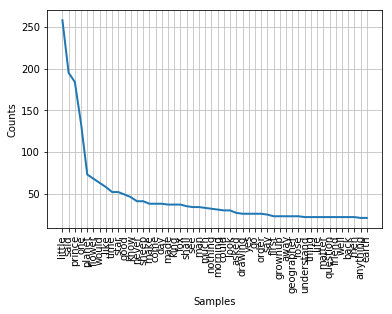

None


In [53]:
########### Código en text_exploration.py ###########
from nltk import FreqDist

# Tenemos un Enum para que la persona pueda eligir cual quieres usar. 
class Text(Enum):
    NONE = 0
    PORTERED = 1
    LANCASTERED = 2
    LEMMATIZED = 3
    
class Text_Explorer():
    
    # En el primero vamos tener el texto en un formato nltk.Text
    __nltk_text = []
    # En el segundo vamos tener la distribuición de frecuencia de los tokens
    __freq_dist = []
    
    # Ese es el método que va cargar todo el texto cuando la persona pasar el path del archivo
    def __read_book_from_source(self, source):
        f = open(source, 'r')
        text = ''
        for line in f:
            if(line != '\n'):
                text += line
        
        return text
    
    # Con el objeto nltk.text que vamos crear podemos crear un objeto FreqDist
    def __frequency_distribution(self, text):
        freq_dist = FreqDist(text)
        return freq_dist
    
    # El constructor de la clase
    def __init__(self, source):
        
        # Acá tenemos todo el texto del libro, sin tratamiento
        raw = self.__read_book_from_source(source)
        
        # Ahora creamos 4 tokens, un para cada modo: Ningun Stemmer or Lammatizer, Porter, Lancaster y por fin Lemmatization
        tokens_none = pre_process_text(raw, None)
        tokens_porter = pre_process_text(raw, StemLem.PORTER)
        tokens_lancaster = pre_process_text(raw, StemLem.LANCASTER)
        tokens_lemmatization = pre_process_text(raw, StemLem.LEMMATIZATION)
        
        # Hacemos los nltk.Text para cada token y sus respectivos FreqDist
        nltk_text_none = nltk.Text(tokens_none)
        freq_dist_none = self.__frequency_distribution(nltk_text_none)
        nltk_text_porter = nltk.Text(tokens_porter)
        freq_dist_porter = self.__frequency_distribution(nltk_text_porter)
        nltk_text_lancaster = nltk.Text(tokens_lancaster)
        freq_dist_lancaster = self.__frequency_distribution(nltk_text_lancaster)
        nltk_text_lemmatization = nltk.Text(tokens_lemmatization)
        freq_dist_lemmatization = self.__frequency_distribution(nltk_text_lemmatization)
        
        # Por fin ponemos todos en las listas, asi cuando utilizar el enum, podemos usar lo equivalente.
        # None es el index 0, el primero, porter es el index 1, el segundo, y asi por delante.
        self.__nltk_text = [nltk_text_none, nltk_text_porter, nltk_text_lancaster, nltk_text_lemmatization]
        self.__freq_dist = [freq_dist_none, freq_dist_porter, freq_dist_lancaster, freq_dist_lemmatization]
        
    # Ese metodo entrega una lista con las palabras mas comunes (puede poner un limite)
    def most_frequent_words(self, limit=500, text=Text.LEMMATIZED):
        ret = [i for i in self.__freq_dist[text.value].most_common(limit)]
        return ret
    
    # Acá poderemos hacer un plot de las "number" palabras más comunes
    def plot_frequency_distribution_number(self, number, text=Text.LEMMATIZED):
        %matplotlib inline 
        ret = self.__freq_dist[text.value].plot(number)
        return ret
    
    # Ese es para la 4ª tarea, es para hacer un grafico de disperción de un conjunto de palabras por todo el libro
    def dispersion_plot_words(self, words, text=Text.LEMMATIZED):
        %matplotlib inline
        ret = self.__nltk_text[text.value].dispersion_plot(words)
        return ret    
    
# Ahora podemos utilizar la clase
txt_exp = Text_Explorer(book_file)
print("Las 50 palabras mas comunes son:")
print(txt_exp.most_frequent_words(50))
print("\nAhora un grafico con las 50 palavras mas comunes:")
print(txt_exp.plot_frequency_distribution_number(50))

Asi podemos buscar las palabras mas comunes con el FreqDist, esas son las stopwords, junto con las stopwords del idioma inglés. Cual es el limite para una palabra ser "muy comum" que no hay un significado es subjetivo, entonces yo voy considerar las que aparecen más de 100 veces como sin significado pues aparecen "mucho".

In [69]:
print("Las stop-words son las stopwords del vocabulario inglés:")
print("{} (...)".format(stopwords.words('english')[:30]))
print("({} elementos)".format(len(stopwords.words('english'))))
print("Y las palabras que aparecen mas de 100 veces en el libro:")
print([key for key, value in [element for element in txt_exp.most_frequent_words(4)]])

Las stop-words son las stopwords del vocabulario inglés:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself'] (...)
(179 elementos)
Y las palabras que aparecen mas de 100 veces en el libro:
['little', 'said', 'prince', 'one']


# 4ª Tarea
Abajo hay un gráfico con la disperción de las palabras: little, prince, sheep, planet, astronomer, king, rose

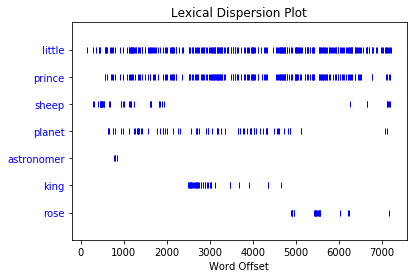

In [70]:
words = ['little', 'prince', 'sheep', 'planet', 'astronomer', 'king', 'rose']
txt_exp.dispersion_plot_words(words)